In [1]:
import os 
os.chdir("/Users/mitchv34/Work/WFH")

%load_ext autoreload

In [2]:
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


from src.empirical.data_exploration.soc_structure import OccupationHierarchy
from src.empirical.skill_vector_occ.skill_vector_occ import append_and_create_wide
from src.empirical.skill_vector_occ.skill_vector_occ import pre_process_wide_data
from src.empirical.skill_vector_occ.skill_vector_occ import process_skill_vectors_python
from src.empirical.skill_vector_occ.skill_vector_occ import add_names_and_titles

from src.empirical.data_exploration.soc_structure import OccupationHierarchy
hierarchy = OccupationHierarchy()

Successfully loaded 1447 occupation codes from data/aux_and_croswalks/soc_structure_2018.csv


In [3]:
# Load Auxiliary Data
BASE_DIR = "."
REFERENCE_DATA_DIR = os.path.join(BASE_DIR, 'data', 'onet_data', 'processed', 'reference')
content_model = pd.read_csv(os.path.join(REFERENCE_DATA_DIR, 'CONTENT_MODEL_REFERENCE.csv'))

In [12]:
files_to_read = ['WORK_ACTIVITIES', 'SKILLS', 'ABILITIES', 'KNOWLEDGE']

ANCHOR_COLS = ["2.C.3.e", "2.A.1.e", "2.B.1.a"] # These are unambiguous columns to anchor the PCA process

onetscores_wide = append_and_create_wide(files_to_read, imporance_weight=False, non_relevance_exclude=False)

skill_vectors, anchor_cols_list, clusters = process_skill_vectors_python(onetscores_wide, anchor_cols = ANCHOR_COLS, n_components=3)

skill_vectors, named_clusters = add_names_and_titles(skill_vectors, clusters, add_occupation_titles=True, named_factors=True)

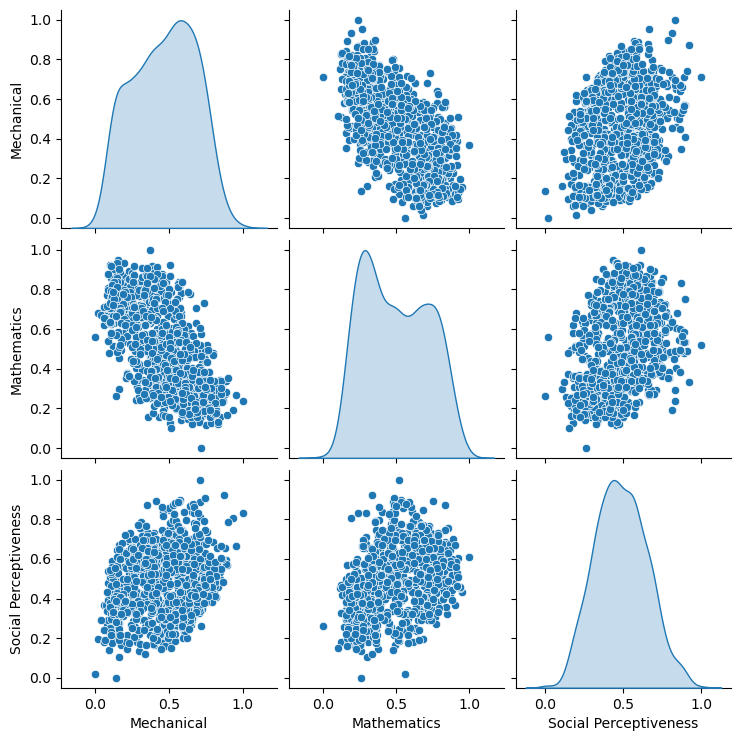

In [13]:
sns.pairplot(skill_vectors, diag_kind='kde')

In [14]:
major = []
minor = []
broad = []
detailed = []
major_title = []
minor_title = []
broad_title = []
detailed_title = []

for code in skill_vectors.index:
    hierarchy_info, titles = hierarchy.get_full_hierarchy(code, include_titles=True)
    major.append(hierarchy_info['major'][0])
    minor.append(hierarchy_info['minor'][0])
    broad.append(hierarchy_info['broad'][0])
    detailed.append(hierarchy_info['detailed'][0])
    major_title.append(titles['major_title'][0])
    minor_title.append(titles['minor_title'][0])
    broad_title.append(titles['broad_title'][0])
    detailed_title.append(titles['detailed_title'][0])

skill_vectors['occ_major'] = major
skill_vectors['occ_minor'] = minor
skill_vectors['occ_broad'] = broad
skill_vectors['occ_detailed'] = detailed
# Save skill vectors to csv
# Take a copy of the skill vectors and save them to a csv file
skill_vectors_copy = skill_vectors.copy()
skill_vectors_copy.rename(columns={
    "Mechanical": "mechanical",
    "Mathematics": "cognitive",
    "Social Perceptiveness": "social"
}, inplace=True)
skill_vectors_copy.to_csv(os.path.join(BASE_DIR, 'data', 'results', 'skill_vectors.csv'), index=True)

skill_vectors['occ_major_title'] = major_title
skill_vectors['occ_minor_title'] = minor_title
skill_vectors['occ_broad_title'] = broad_title
skill_vectors['occ_detailed_title'] = detailed_title

skill_vectors

,Mechanical,Mathematics,Social Perceptiveness,OCCUPATION_TITLE,occ_major,occ_minor,occ_broad,occ_detailed,occ_major_title,occ_minor_title,occ_broad_title,occ_detailed_title
ONET_SOC_CODE,,,,,,,,,,,,
11-1011.00,0.327752,0.855019,0.756098,Chief Executives,11-0000,11-1000,11-1010,11-1011,Management Occupations,Top Executives,Chief Executives,Chief Executives
11-1011.03,0.303989,0.835875,0.684711,Chief Sustainability Officers,11-0000,11-1000,11-1010,11-1011,Management Occupations,Top Executives,Chief Executives,Chief Executives
11-1021.00,0.340914,0.700523,0.527824,General and Operations Managers,11-0000,11-1000,11-1010,11-1021,Management Occupations,Top Executives,Chief Executives,General and Operations Managers
11-2011.00,0.160354,0.775236,0.473351,Advertising and Promotions Managers,11-0000,11-2000,11-2010,11-2011,Management Occupations,"Advertising, Marketing, Promotions, Public Rel...",Advertising and Promotions Managers,Advertising and Promotions Managers
11-2021.00,0.158683,0.836622,0.504917,Marketing Managers,11-0000,11-2000,11-2010,11-2021,Management Occupations,"Advertising, Marketing, Promotions, Public Rel...",Advertising and Promotions Managers,Marketing Managers
...,...,...,...,...,...,...,...,...,...,...,...,...
53-7071.00,0.753167,0.298861,0.457691,Gas Compressor and Gas Pumping Station Operators,53-0000,53-7000,53-7010,53-7071,Transportation and Material Moving Occupations,Material Moving Workers,Conveyor Operators and Tenders,Gas Compressor and Gas Pumping Station Operators
53-7072.00,0.744588,0.309480,0.467331,"Pump Operators, Except Wellhead Pumpers",53-0000,53-7000,53-7010,53-7072,Transportation and Material Moving Occupations,Material Moving Workers,Conveyor Operators and Tenders,"Pump Operators, Except Wellhead Pumpers"
53-7073.00,0.731732,0.230593,0.423560,Wellhead Pumpers,53-0000,53-7000,53-7010,53-7073,Transportation and Material Moving Occupations,Material Moving Workers,Conveyor Operators and Tenders,Wellhead Pumpers


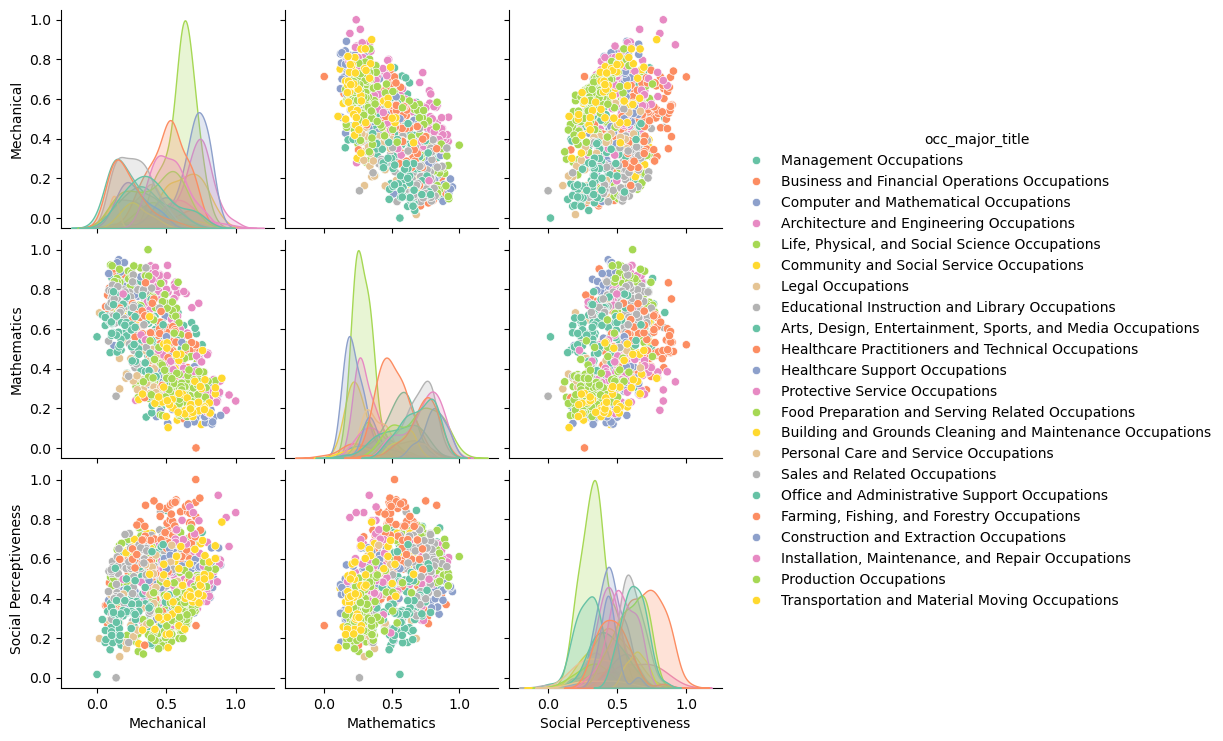

In [7]:
sns.pairplot(skill_vectors, diag_kind='kde', hue='occ_major_title', palette='Set2')

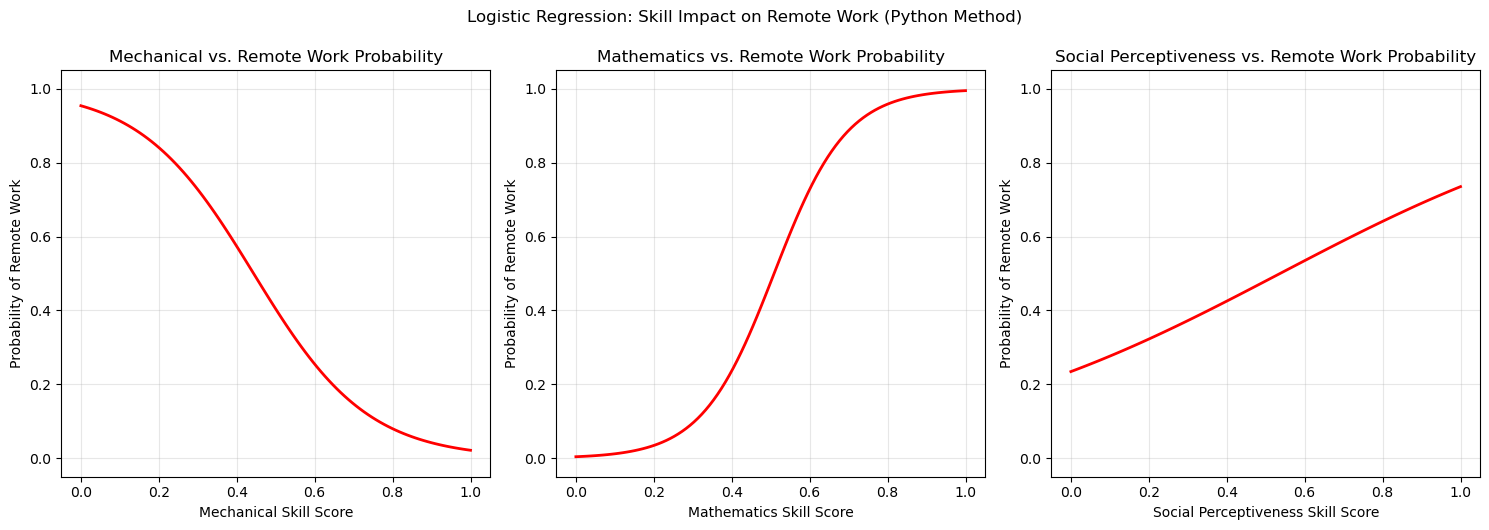

<Figure size 1500x1000 with 0 Axes>

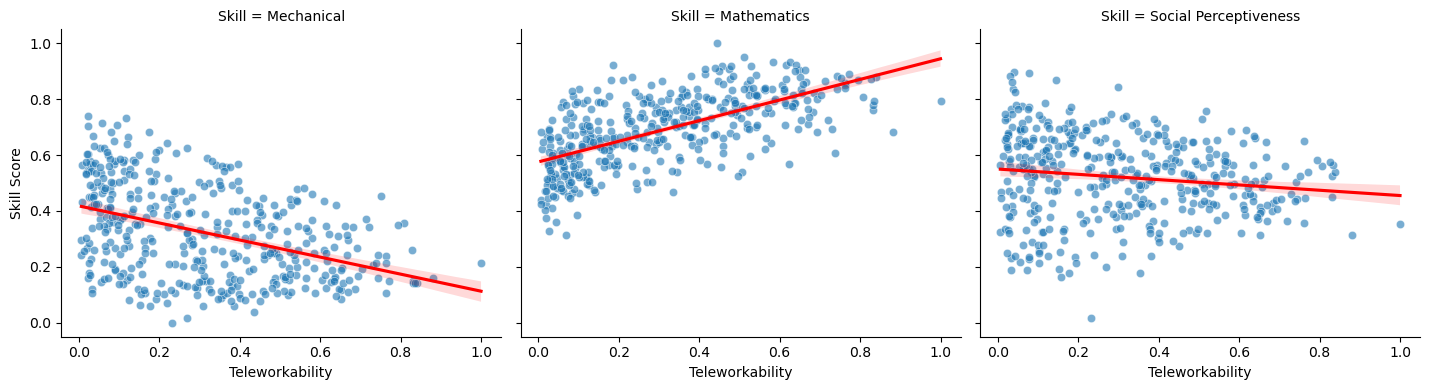

In [8]:
from sklearn.linear_model import LogisticRegression

# # Load WFH data
wfh_data = pd.read_csv("data/results/wfh_estimates.csv").set_index('ONET_SOC_CODE')
# Merge WFH data with skill vectors
skill_vectors = skill_vectors.join(wfh_data["ESTIMATE_WFH_ABLE"], how='left')

ANCHOR_COLS_NAMES = ['Mechanical', 'Mathematics', 'Social Perceptiveness']

# Fit logistic regression models for each skill
python_models = {}
for col in ANCHOR_COLS_NAMES:
    if col == 'OCCUPATION_TITLE' or col == 'ESTIMATE_WFH_ABLE':
        continue
    X = skill_vectors[col].values.reshape(-1, 1)
    # Create a binary target for logistic regression (assuming > 0.5 means remote work)
    y = (skill_vectors['ESTIMATE_WFH_ABLE'] > 0.0).astype(int)
    model = LogisticRegression()
    model.fit(X, y)
    python_models[col] = model

# Plot logistic curves for each skill 
plt.figure(figsize=(15, 5))

for i, (skill_name, model) in enumerate(python_models.items()):
    plt.subplot(1, 3, i+1)
    
    # Create a range of values for the skill
    x_range = np.linspace(0, 1, 100).reshape(-1, 1)
    # Predict probabilities
    y_probs = model.predict_proba(x_range)[:, 1]
    
    # Plot the curve
    plt.plot(x_range, y_probs, 'r-', linewidth=2)
    
    plt.title(f'{skill_name} vs. Remote Work Probability')
    plt.xlabel(f'{skill_name} Skill Score')
    plt.ylabel('Probability of Remote Work')
    plt.grid(True, alpha=0.3)
    plt.ylim(-0.05, 1.05)

plt.tight_layout()
plt.suptitle('Logistic Regression: Skill Impact on Remote Work (Python Method)', y=1.05)
plt.show()

# Create FacetGrid plots to visualize relationships between skill indices and WFH ability
plt.figure(figsize=(15, 10))

skills_melted_python = pd.melt(
    skill_vectors.reset_index(), 
    id_vars=['ONET_SOC_CODE', 'OCCUPATION_TITLE', 'ESTIMATE_WFH_ABLE'],
    value_vars=['Mechanical', 'Mathematics', 'Social Perceptiveness'],
    var_name='Skill', value_name='Score'
)

# Plot for Python method
g = sns.FacetGrid(skills_melted_python[skills_melted_python.ESTIMATE_WFH_ABLE > 0],
                col='Skill', height=4, aspect=1.2)

g.map_dataframe(sns.scatterplot, y='Score', x='ESTIMATE_WFH_ABLE', alpha=0.6)
g.map_dataframe(sns.regplot, y='Score', x='ESTIMATE_WFH_ABLE', scatter=False, color='red')
g.set_axis_labels('Teleworkability', 'Skill Score')
# g.set_titles('{col} Skills vs WFH Ability (Python)')
plt.show()